<a href="https://colab.research.google.com/github/kganeshv12/M_test_1/blob/master/Mch2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -Uqq fastai duckduckgo_search


In [97]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images = 150):
  print("searching for : ", term)
  return L(ddg_images(term, max_results = max_images)).itemgot('image')

In [125]:
urls = search_images('Grizzly bear', max_images = 150)
urls[0]

searching for :  Grizzly bear


'http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg'

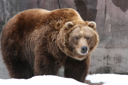

In [126]:
from fastdownload import download_url

dest1 = 'Grizzly.jpg'
download_url(urls[0], dest1, show_progress= True) #it was false here

from fastai.vision.all import *
im = Image.open(dest1)
im.to_thumb(128,128)

In [127]:
# len(urls)

In [133]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [146]:
# if not path.exists():
#     path.mkdir()
#     for o in bear_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images(f'{o} bear')
#         download_images(dest, urls=search_images(f'{o} photo'))

from time import sleep
for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} bear photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)        
        

searching for :  grizzly bear photo
searching for :  black bear photo
searching for :  teddy bear photo


In [147]:
fns = get_image_files(path)
fns

(#433) [Path('bears/teddy/a04a18e0-96bf-4b29-903d-9f9087cf0906.jpg'),Path('bears/teddy/c0a7654a-bf00-43fa-a497-74f359e63507.jpg'),Path('bears/teddy/9cd1eb69-e6e6-47fa-84b1-182fe71b5c48.jpeg'),Path('bears/teddy/b3b07bdc-8bfc-4060-b1ac-6d2b6942603d.jpg'),Path('bears/teddy/9baea814-0a44-494a-ab76-82413cca801f.jpg'),Path('bears/teddy/2e7d5a3d-5520-4fe2-bc7a-e614055194d0.jpg'),Path('bears/teddy/252b2036-dcd7-4131-a611-b8bf6c20d611.jpg'),Path('bears/teddy/bb1f742d-b021-416f-88f0-9c70044f89a6.jpeg'),Path('bears/teddy/ca9265a4-3c2e-4272-b8e9-7725286d9bb7.jpg'),Path('bears/teddy/1165cc7b-0d2a-4e9d-88c1-508b5c043aca.jpeg')...]

In [159]:
failed = verify_images(fns)
failed.map(Path.unlink)
failed

(#15) [Path('bears/teddy/ae757874-b629-450e-86cc-d24da776754d.jpg'),Path('bears/teddy/fa3f7942-fff1-4128-9454-3ca33493c578.jpg'),Path('bears/teddy/1b1bc488-0fbe-4d18-87bb-20b506b14a82.jpg'),Path('bears/teddy/a0381bd0-c669-4b72-a7d9-ba096c88374e.jpg'),Path('bears/teddy/8ab2607e-86f1-40da-a269-e7cce5dbdf70.jpg'),Path('bears/black/782c06b5-34c6-4e00-badc-7f8d99f3d386.jpg'),Path('bears/black/ef360511-12f5-4e12-b5fd-6af80b4d75e2.jpg'),Path('bears/black/0b5a474f-a6e1-42da-923e-97d37bc02f52.jpg'),Path('bears/black/70ae0bbb-3f65-4997-9fad-a18733d6cc4f.jpg'),Path('bears/black/d5441a7b-fb82-498a-8cbc-4b501935a19a.jpg')...]

In [160]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [161]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [162]:
blocks=(ImageBlock, CategoryBlock)

In [163]:
get_items=get_image_files

In [164]:
splitter=RandomSplitter(valid_pct=0.2, seed=42)

In [165]:
get_y=parent_label

In [166]:
item_tfms=Resize(128)

In [167]:
dls = bears.dataloaders(path)

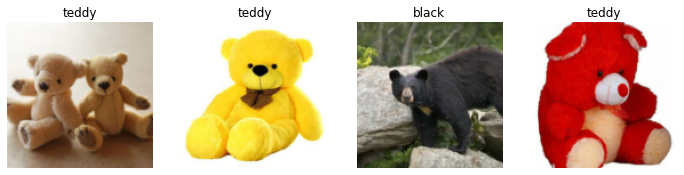

In [168]:
dls.valid.show_batch(max_n=4, nrows=1)

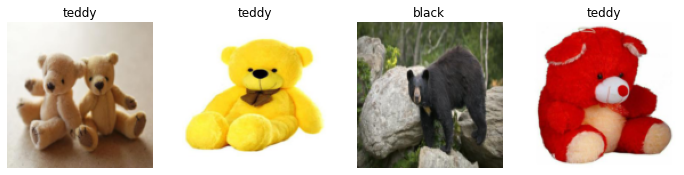

In [169]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

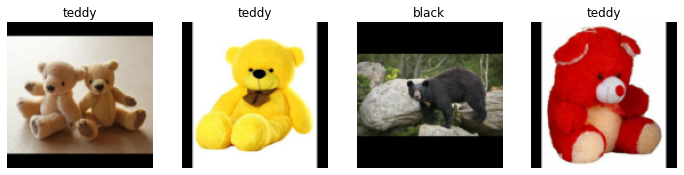

In [170]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

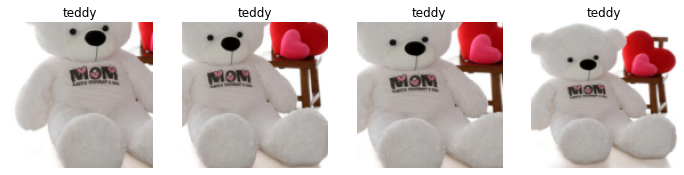

In [171]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

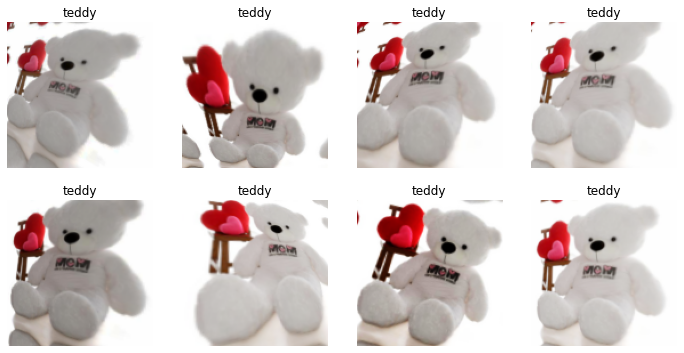

In [172]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [173]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [175]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

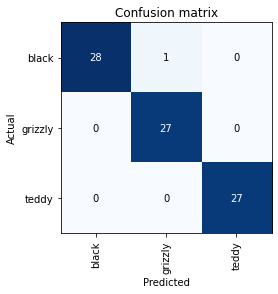

In [176]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

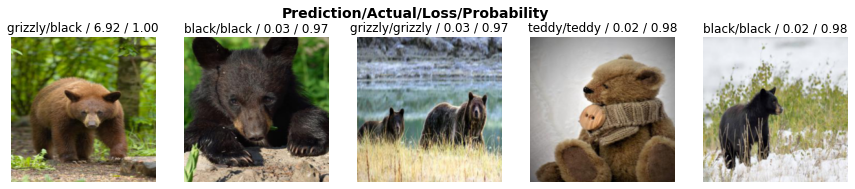

In [177]:
interp.plot_top_losses(5, nrows=1)

In [184]:
!pip install ipyevents

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 KB 5.6 MB/s eta 0:00:00


In [189]:
!pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [192]:
from fastai.vision.widgets import *

In [193]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner


In [194]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)